In [2]:
%matplotlib inline

In [79]:
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from textwrap import wrap

# Import Data

In [4]:
#read data in from pickle file
df = pd.read_pickle('C:/Users/Stacey/Downloads/NY_complaint_data_cleaned.pkl')

** View distributions of offense type for all precincts by year **

In [19]:
#remove rows with blank offense description
df = df[~df.OFNS_DESC.isnull()]

In [63]:
#remove parenthesis from text
df['OFFENSE'] = df['CAT_OFNS'].str.replace('[^\w\s]',' ')

In [67]:
years = list(df.CMPLNT_FR_DATE_YEAR.unique())
years.sort()
months = list(df.CMPLNT_FR_DATE_MONTH.unique())
months.sort()
offenses = list(df.OFFENSE.unique())
offenses.sort()

In [70]:
combinations = [(x,y) for x in years for y in offenses]
combinations[0:5]

[(2006, 'FELONY ABORTION'),
 (2006, 'FELONY ARSON'),
 (2006, 'FELONY BURGLARY'),
 (2006, 'FELONY CHILD ABANDONMENT NON SUPPORT'),
 (2006, 'FELONY CRIMINAL MISCHIEF   RELATED OF')]

In [71]:
#group by year, month, precinct, and offense type
df_agg = df[['CMPLNT_NUM','CMPLNT_FR_DATE_YEAR','CMPLNT_FR_DATE_MONTH',
             'BORO','BORO_PREC','PRECINCT','LAW_CAT_CD','OFNS_DESC','OFFENSE']
           ].groupby(['CMPLNT_FR_DATE_YEAR','CMPLNT_FR_DATE_MONTH',
                      'BORO','BORO_PREC','PRECINCT','LAW_CAT_CD',
                      'OFNS_DESC','OFFENSE'],as_index=False).agg(['count'])

#reformat headers
df_agg.columns = ['_'.join(tup).rstrip('_') for tup in df_agg.columns.values]
df_agg.reset_index(col_level=1,inplace = True)

In [72]:
#rename the columns
df_agg.rename(columns={'CMPLNT_FR_DATE_YEAR':'YEAR',
                       'CMPLNT_FR_DATE_MONTH':'MONTH',
                       'CMPLNT_NUM_count':'COUNT'},inplace=True)

In [73]:
list(df_agg)

['YEAR',
 'MONTH',
 'BORO',
 'BORO_PREC',
 'PRECINCT',
 'LAW_CAT_CD',
 'OFNS_DESC',
 'OFFENSE',
 'COUNT']

** Look at most common offenses by precinct by month across all years (same scale for all) **

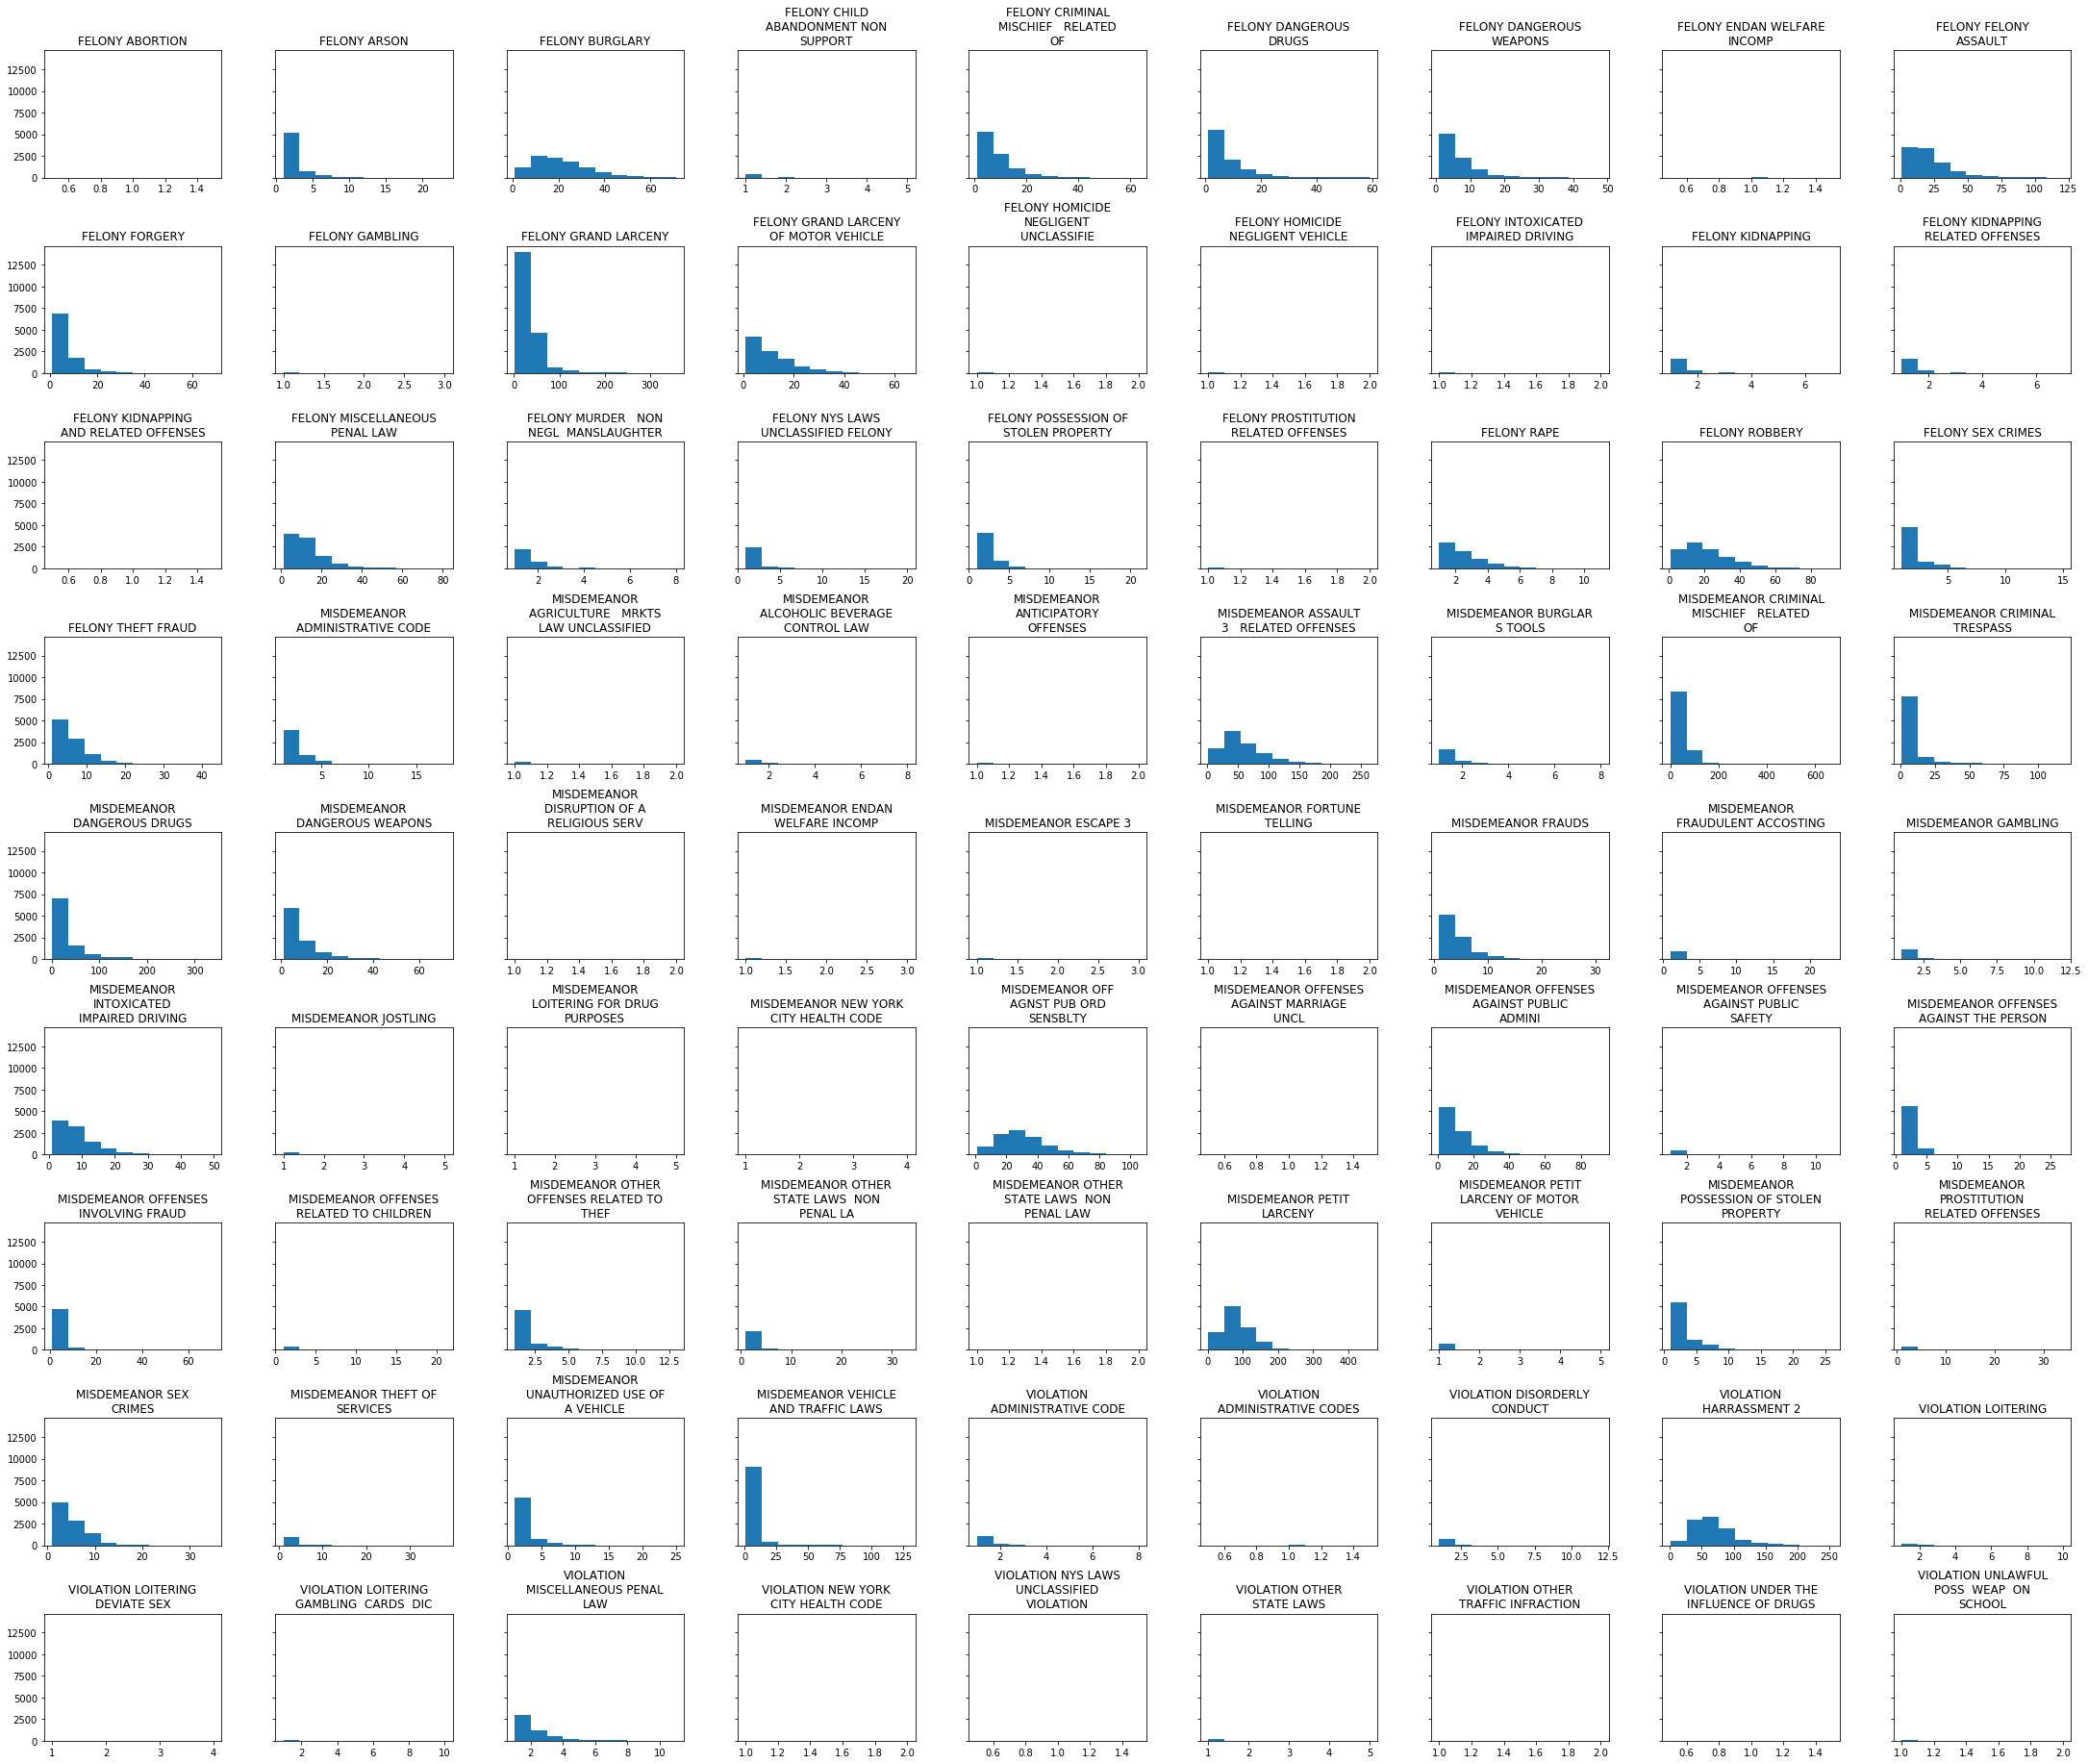

In [84]:
f, axs = plt.subplots(9,9, figsize=(30, 25),sharey=True)
plt.tight_layout(h_pad=5.0,w_pad=4.0)
for i, ax in enumerate(axs.flat):
    offense = offenses[i]
    df_offense = df_agg[df_agg.OFFENSE.str.contains(offense)]
    #print(df_offense.head())
    ax.hist(df_offense.COUNT)
    ax.set_title("\n".join(wrap(offense,20)))
    #ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)
    ax.set_xlabel('')
    ax.set_ylabel('')

** Look at distribution by offense by precinct by month across all years (different scale for each) **

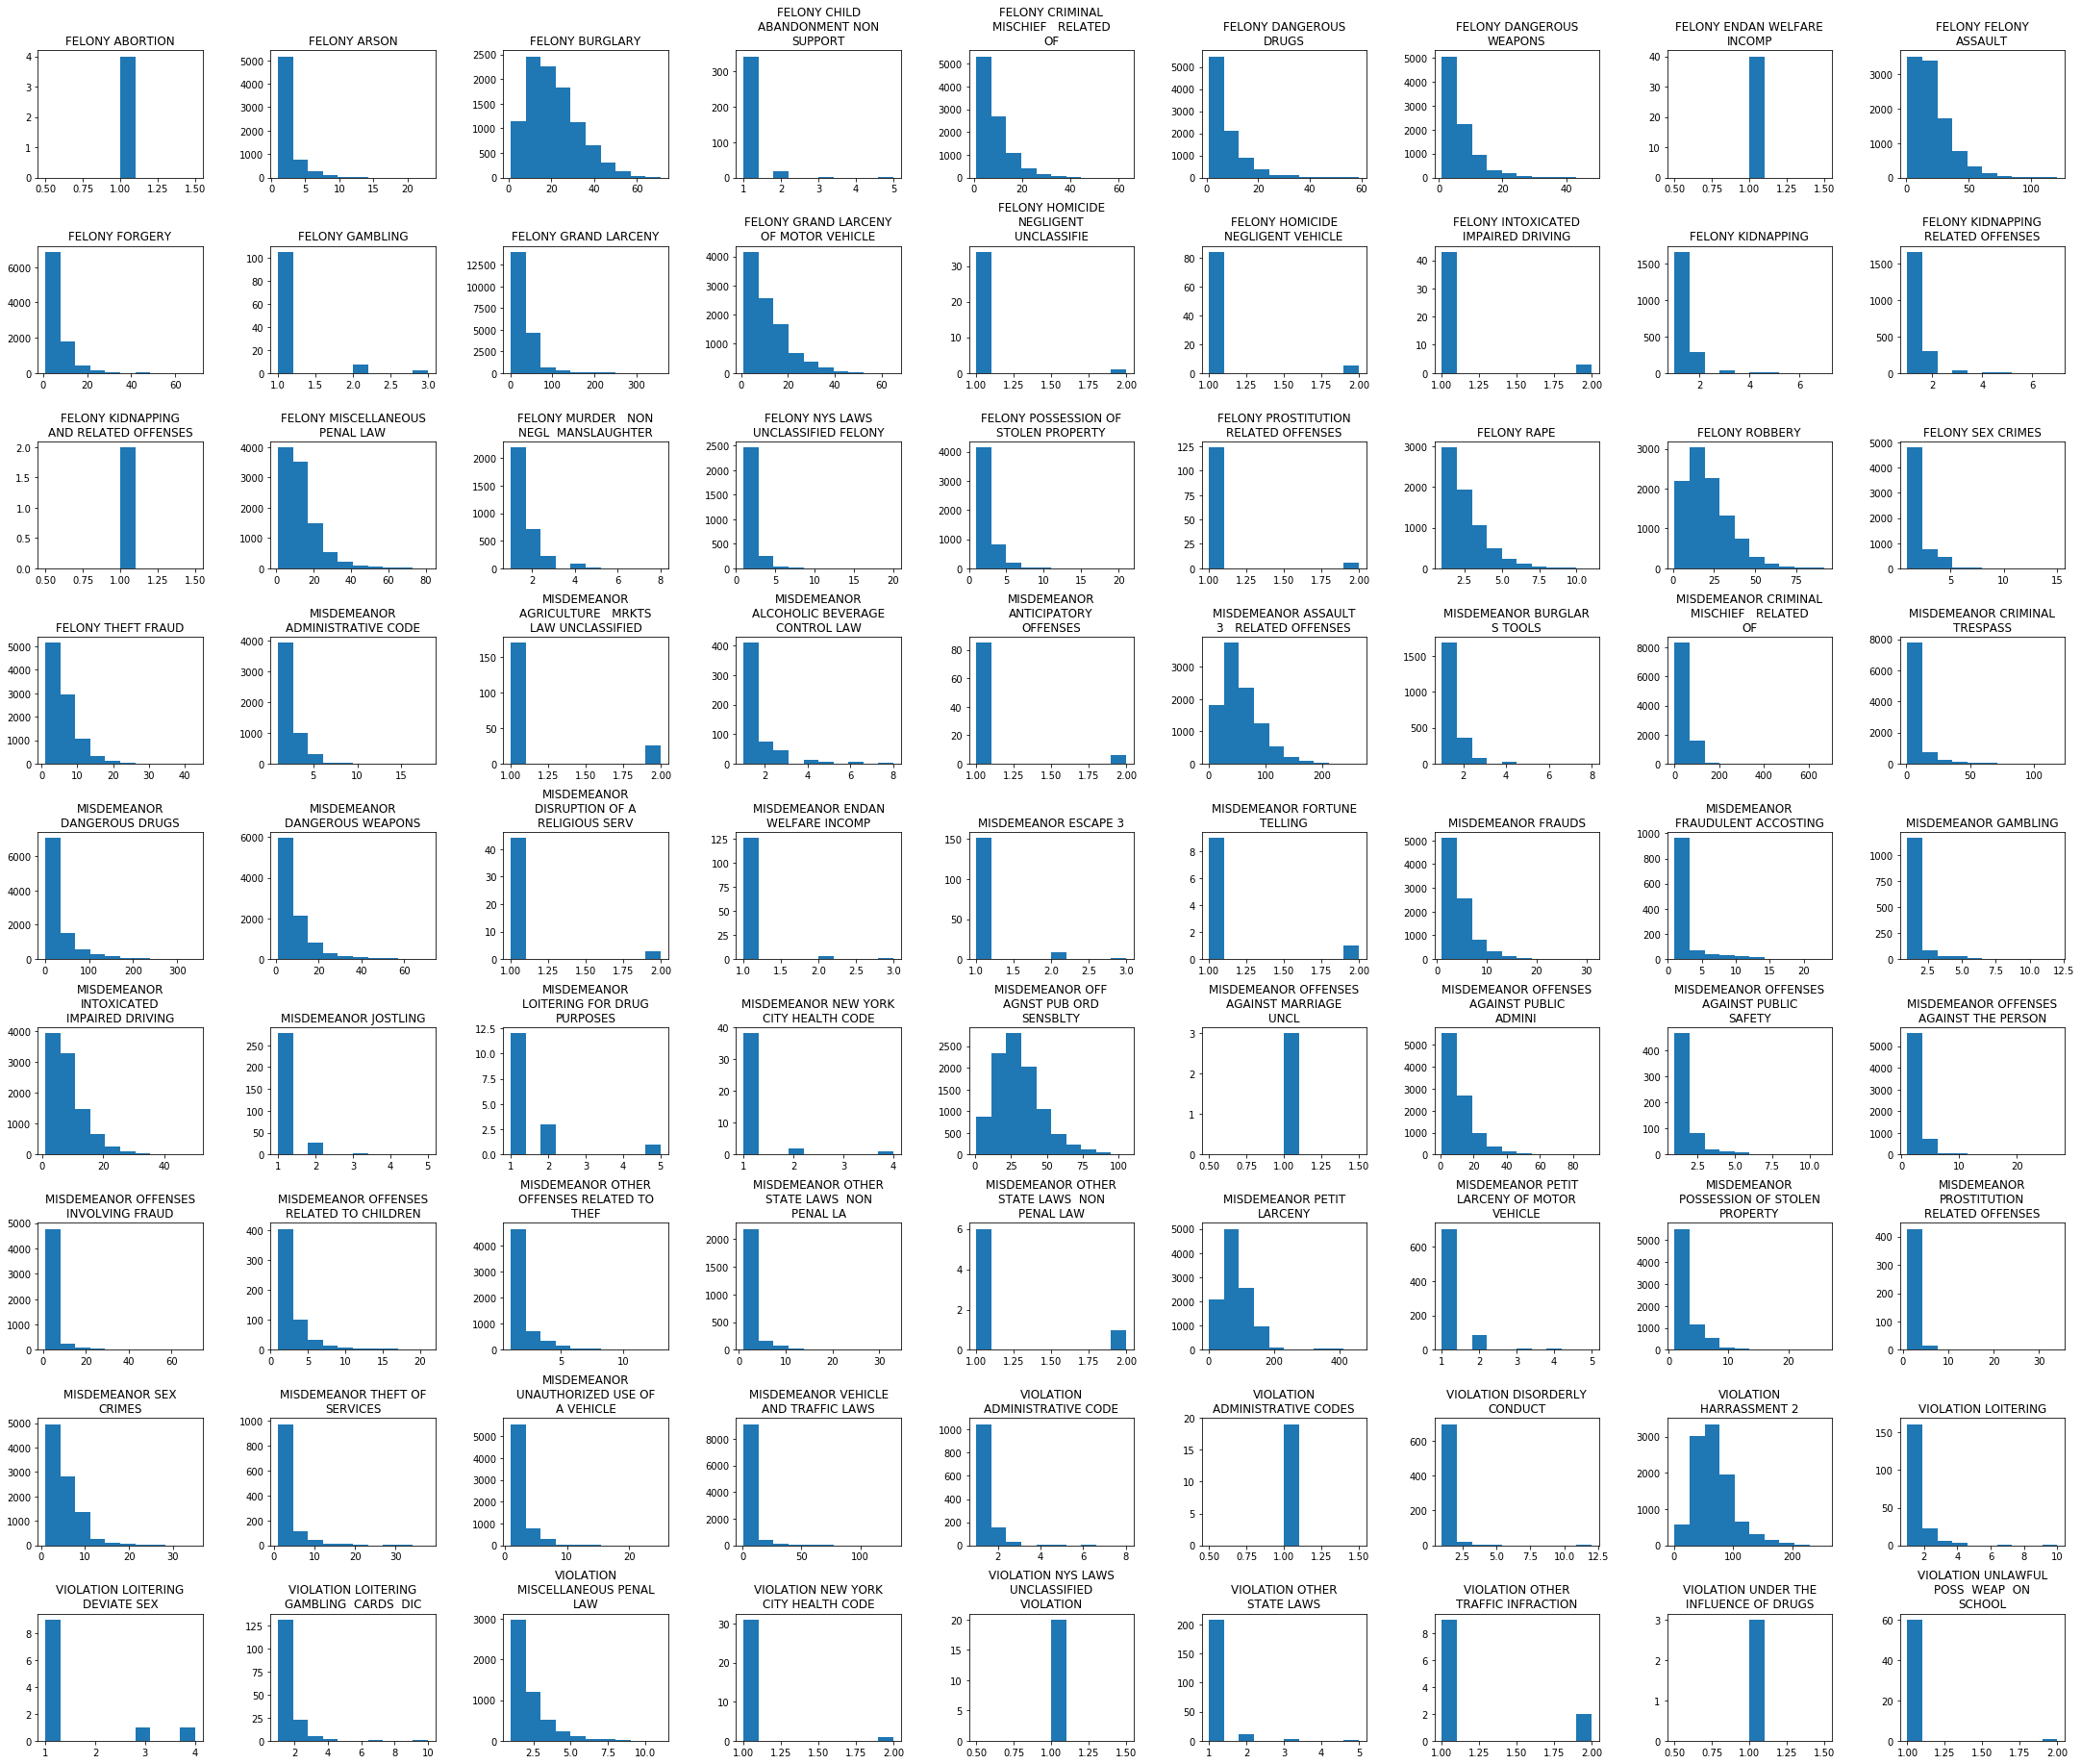

In [88]:
f, axs = plt.subplots(9,9, figsize=(30, 25))
plt.tight_layout(h_pad=5.0,w_pad=4.0)
for i, ax in enumerate(axs.flat):
    offense = offenses[i]
    df_offense = df_agg[df_agg.OFFENSE.str.contains(offense)]
    #print(df_offense.head())
    ax.hist(df_offense.COUNT)
    ax.set_title("\n".join(wrap(offense,20)))
    #ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)
    ax.set_xlabel('')
    ax.set_ylabel('')

** Compare Felony vs Misdemeanor vs Violation **  
by year, by month, by precinct

In [115]:
df_cat_type = df.groupby(['CMPLNT_FR_DATE_YEAR','CMPLNT_FR_DATE_MONTH',
            'PRECINCT','LAW_CAT_CD'])['CMPLNT_NUM'].count().unstack('LAW_CAT_CD')

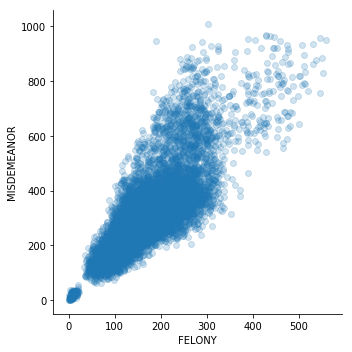

In [121]:
sns.lmplot(x="FELONY", y="MISDEMEANOR", 
           data=df_cat_type, fit_reg=False, scatter_kws={'alpha':0.2})

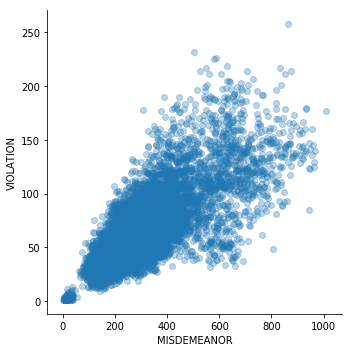

In [122]:
sns.lmplot(x="MISDEMEANOR", y="VIOLATION", 
           data=df_cat_type, fit_reg=False, scatter_kws={'alpha':0.3})

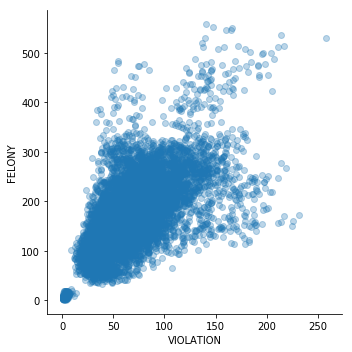

In [123]:
sns.lmplot(x="VIOLATION", y="FELONY", 
           data=df_cat_type, fit_reg=False,scatter_kws={'alpha':0.3})

In [124]:
df_cat_type.corr()

LAW_CAT_CD,FELONY,MISDEMEANOR,VIOLATION
LAW_CAT_CD,,,
FELONY,1.000000,0.799389,0.640149
MISDEMEANOR,0.799389,1.000000,0.753455
VIOLATION,0.640149,0.753455,1.000000


incidence of felonies and misdemeanors have the strongest correlation while violations and felonies have the weakest